In [1]:
a=10
b=20
c=a+b
print(c)

30


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [161]:
bank_df=pd.read_csv("bank.csv",sep=";")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [163]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [165]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [167]:
cat_col=[keys for keys,values in dict(bank_df.dtypes).items() if values=="object"]
num_col=[keys for keys,values in dict(bank_df.dtypes).items() if values!="object"]
num_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [169]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [13]:
#unique value in columns and their numbers
#unique()  #nunique()
for i in cat_col:
    arr=bank_df[i].unique()
    n_arr=bank_df[i].nunique()
    print(arr,n_arr)    

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown'] 12
['married' 'single' 'divorced'] 3
['primary' 'secondary' 'tertiary' 'unknown'] 4
['no' 'yes'] 2
['no' 'yes'] 2
['no' 'yes'] 2
['cellular' 'unknown' 'telephone'] 3
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec'] 12
['unknown' 'failure' 'other' 'success'] 4
['no' 'yes'] 2


In [173]:
bank_df["job"].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

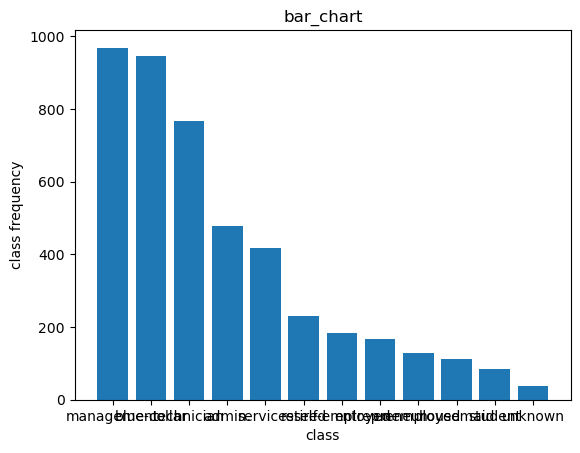

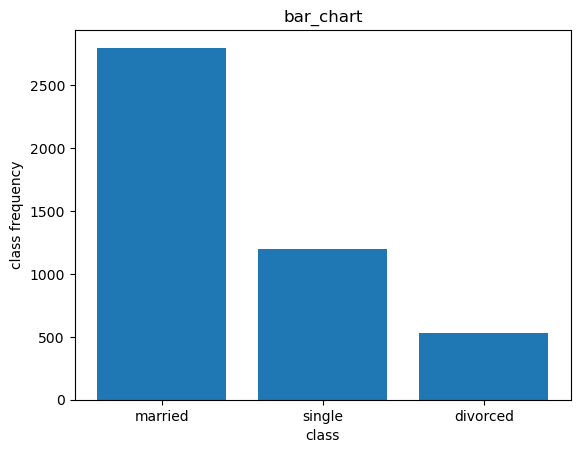

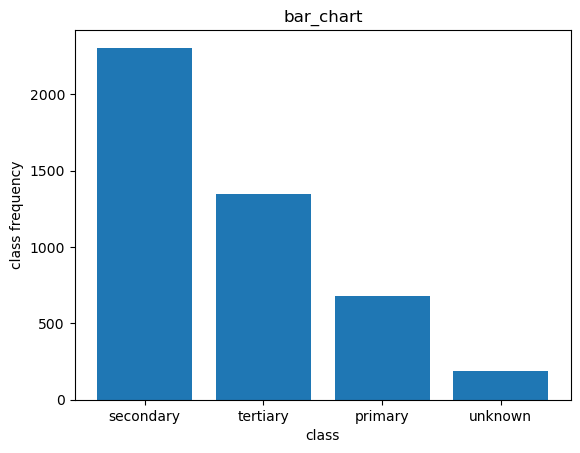

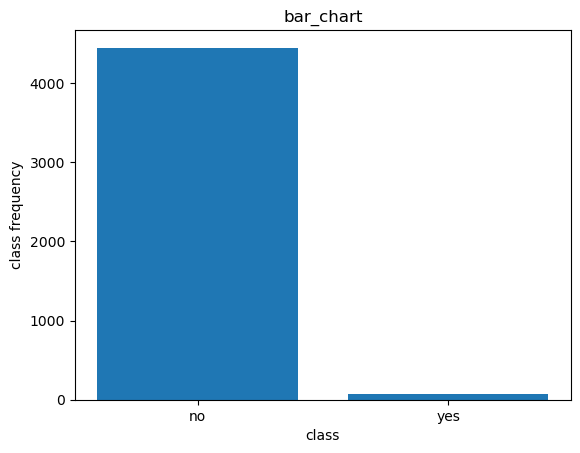

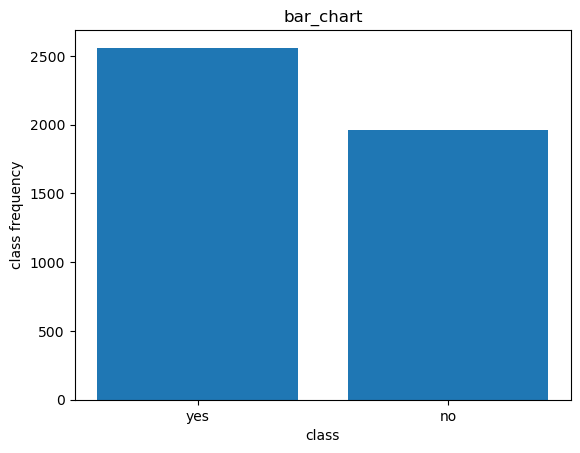

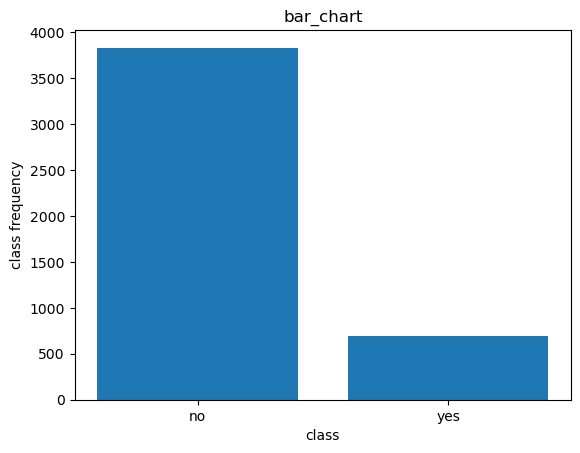

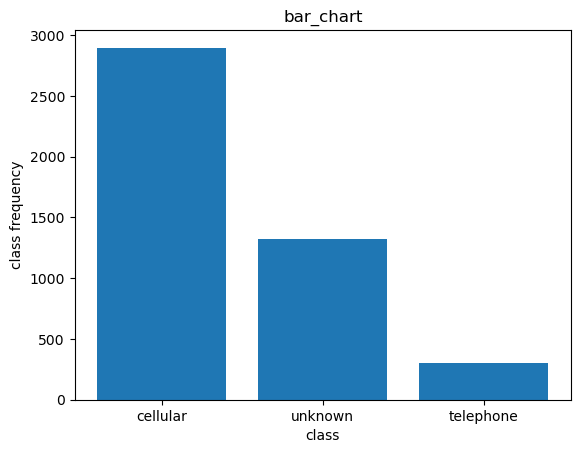

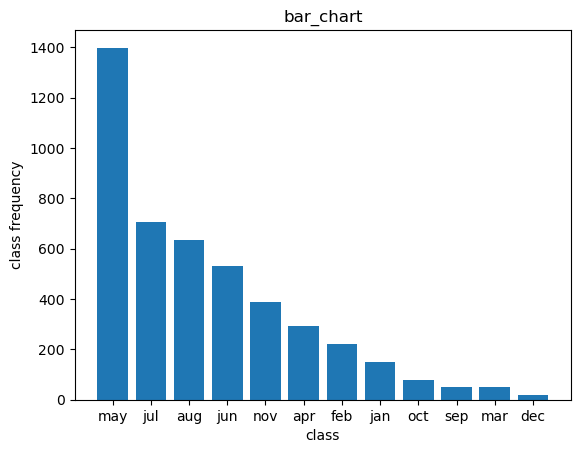

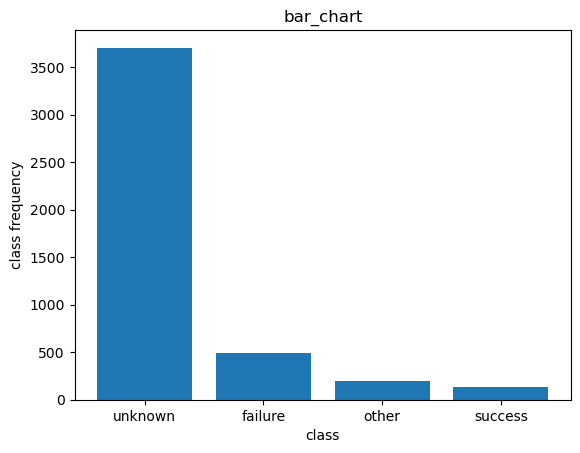

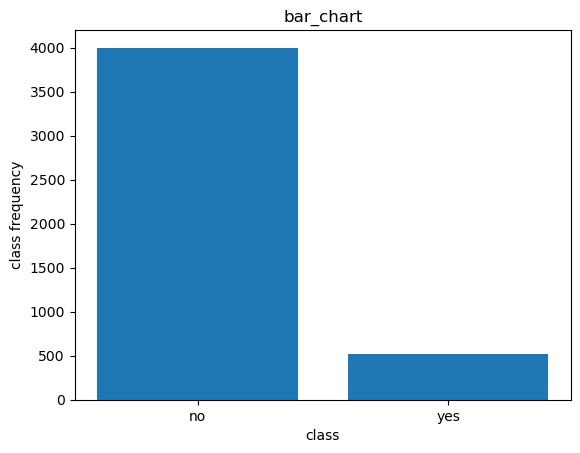

In [175]:
for i in cat_col:
    dnf=bank_df[i].value_counts()   #using value_count() method
    keys=dnf.keys()
    values=dnf.values
    col=[i,"count"]
    df=pd.DataFrame(zip(keys,values),columns=col)

    plt.bar(i,"count",data=df)
    plt.title("bar_chart")
    plt.xlabel("class")
    plt.ylabel("class frequency")
    plt.show()

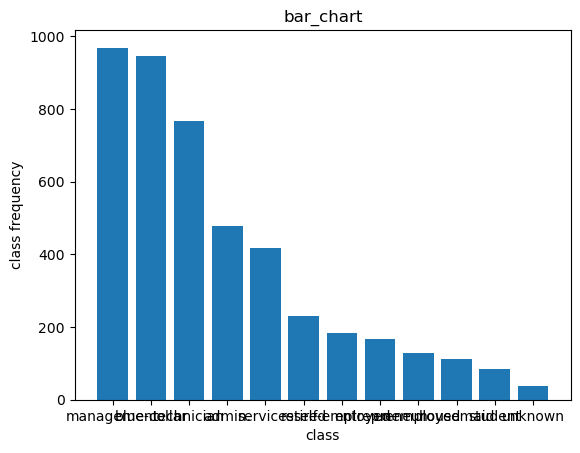

In [177]:
# how to save dataframe and plot in directory folder


dnf=bank_df["job"].value_counts()   #using value_count() method
keys=dnf.keys()
values=dnf.values
col=["job","count"]
df=pd.DataFrame(zip(keys,values),columns=col)
df.to_csv("job.csv",index=False)    #use dataframe name>.<to_csv("name.csv")>

plt.bar("job","count",data=df)
plt.title("bar_chart")
plt.xlabel("class")
plt.ylabel("class frequency")
plt.savefig("job.jpg")
plt.show()

In [179]:
#read the job dataframe 
pd.read_csv("job.csv")

,job,count
0,management,969
1,blue-collar,946
2,technician,768
3,admin.,478
4,services,417
5,retired,230
6,self-employed,183
7,entrepreneur,168
8,unemployed,128
9,housemaid,112


In [181]:
#make folder in directory
import os
os.getcwd()

'C:\\Users\\Mrityunjay\\Desktop\\Data science naresh it\\Self practice'

In [183]:
root_dir=os.getcwd()
new_folder="folder"
new_dir=os.path.join(root_dir,new_folder)
os.makedirs(new_dir)

In [187]:
new_dir

'C:\\Users\\Mrityunjay\\Desktop\\Data science naresh it\\Self practice\\folder'

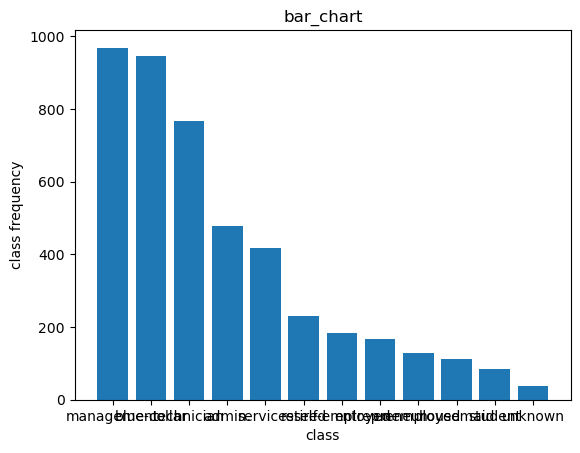

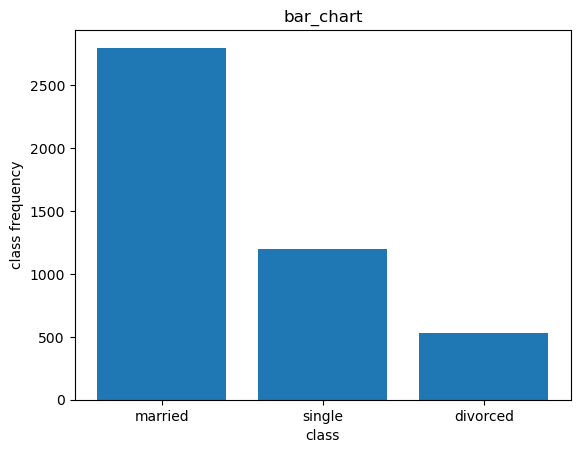

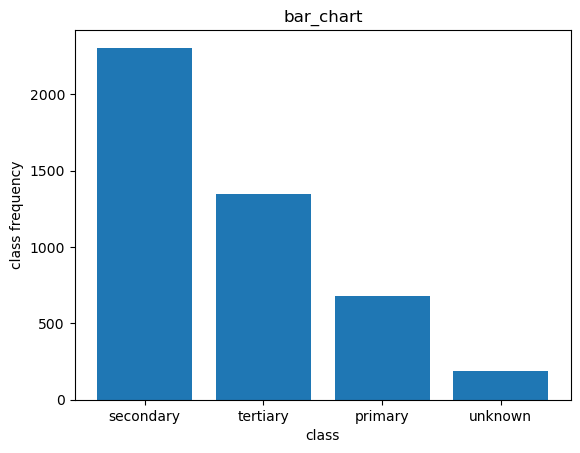

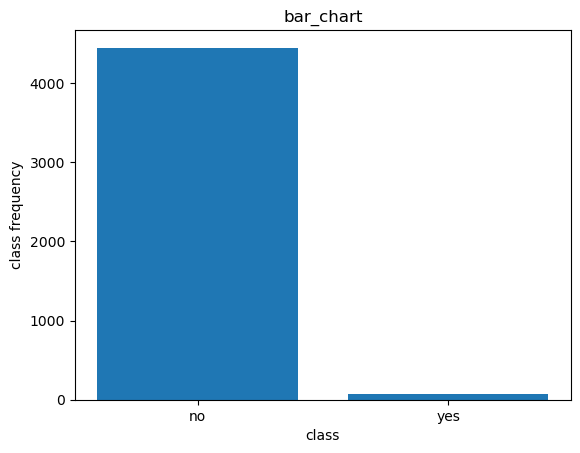

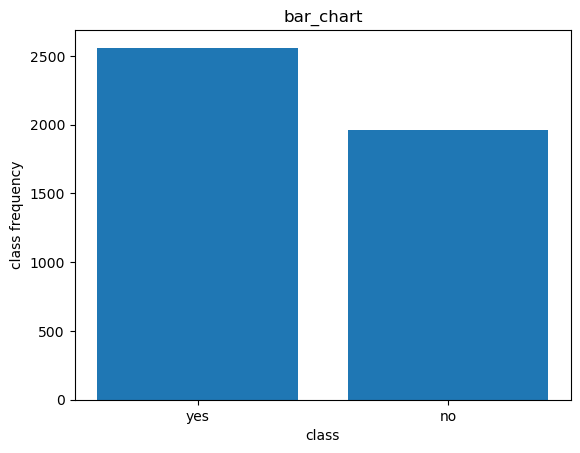

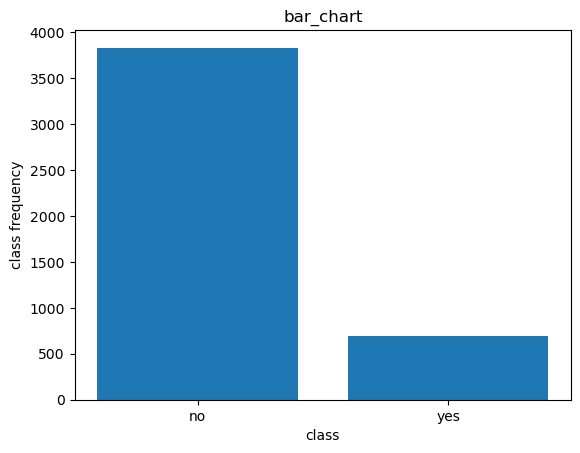

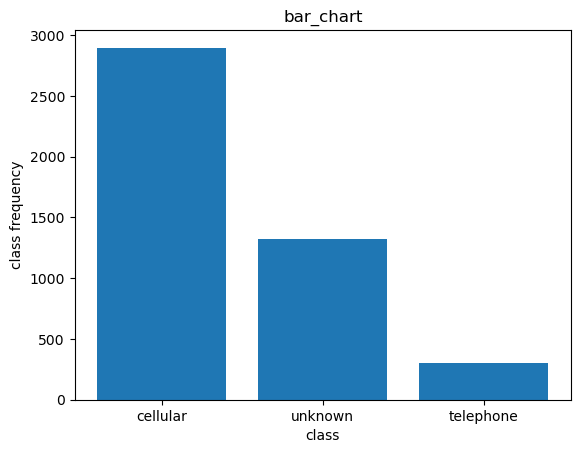

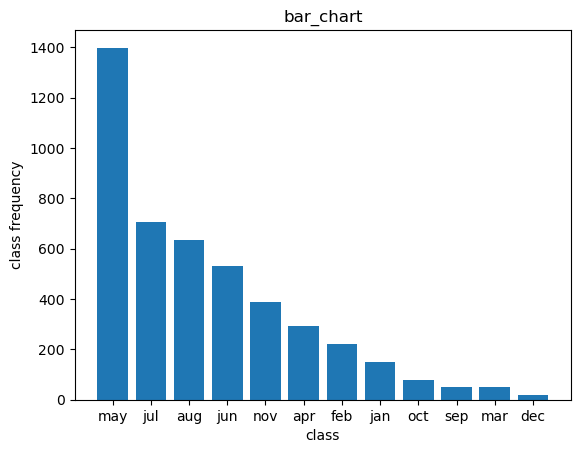

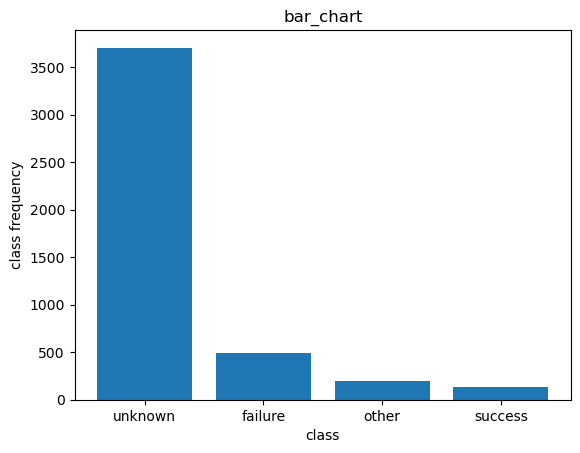

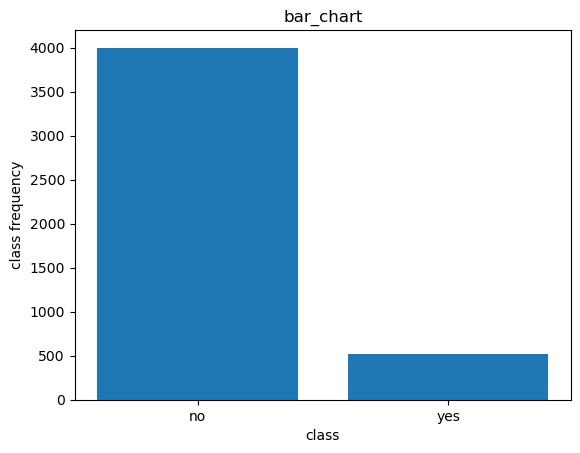

In [189]:
#how to add and read all the categirical columns dataframe and plots in new_folder
for i in cat_col:
    dnf=bank_df[i].value_counts()   #using value_count() method
    keys=dnf.keys()
    values=dnf.values
    col=[i,"count"]
    df=pd.DataFrame(zip(keys,values),columns=col)
    df.to_csv(f"{new_dir}\\{i}.csv",index=False)    #use dataframe name>.<to_csv("name.csv")>
    
    plt.bar(i,"count",data=df)
    plt.title("bar_chart")
    plt.xlabel("class")
    plt.ylabel("class frequency")
    plt.savefig(f"{new_dir}\\{i}.jpg")
    plt.show()

In [191]:
#read the folder dataframes
l=[]
for i in cat_col:
    df=pd.read_csv(f"{new_dir}\\{i}.csv")
    l.append(df)
l

[              job  count
 0      management    969
 1     blue-collar    946
 2      technician    768
 3          admin.    478
 4        services    417
 5         retired    230
 6   self-employed    183
 7    entrepreneur    168
 8      unemployed    128
 9       housemaid    112
 10        student     84
 11        unknown     38,
     marital  count
 0   married   2797
 1    single   1196
 2  divorced    528,
    education  count
 0  secondary   2306
 1   tertiary   1350
 2    primary    678
 3    unknown    187,
   default  count
 0      no   4445
 1     yes     76,
   housing  count
 0     yes   2559
 1      no   1962,
   loan  count
 0   no   3830
 1  yes    691,
      contact  count
 0   cellular   2896
 1    unknown   1324
 2  telephone    301,
    month  count
 0    may   1398
 1    jul    706
 2    aug    633
 3    jun    531
 4    nov    389
 5    apr    293
 6    feb    222
 7    jan    148
 8    oct     80
 9    sep     52
 10   mar     49
 11   dec     20,
   poutcome

In [193]:
orders=bank_df["job"].value_counts().keys()
orders

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object', name='job')

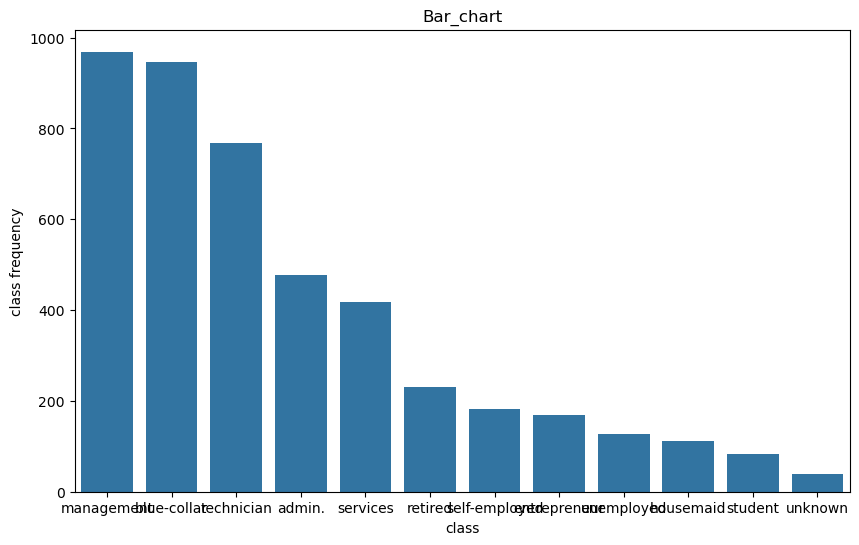

In [195]:
#seaborn plots
orders=bank_df["job"].value_counts().keys()

plt.figure(figsize=(10,6))  #here figuresize wirte above the plot data
sns.countplot(data=bank_df,
             x="job",
             order=orders)

plt.title("Bar_chart")
plt.xlabel("class")
plt.ylabel("class frequency")
plt.savefig("job.jpg")
plt.show()

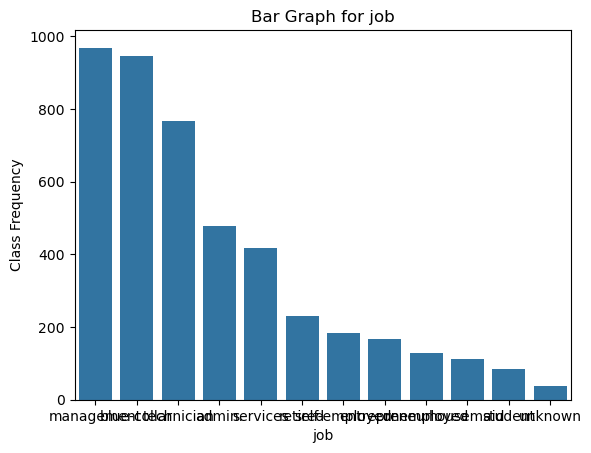

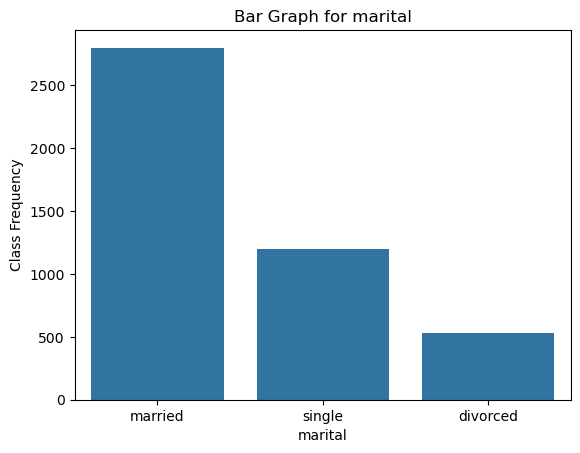

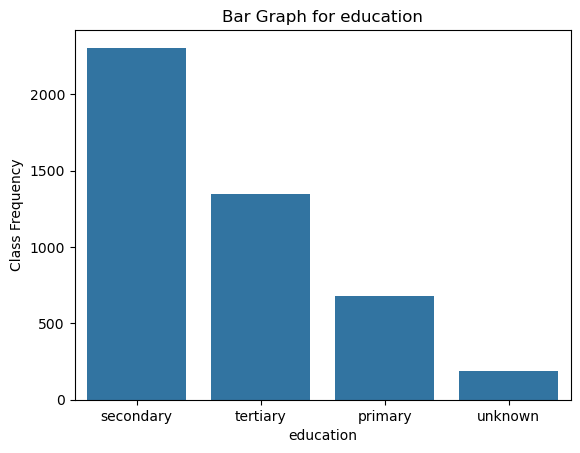

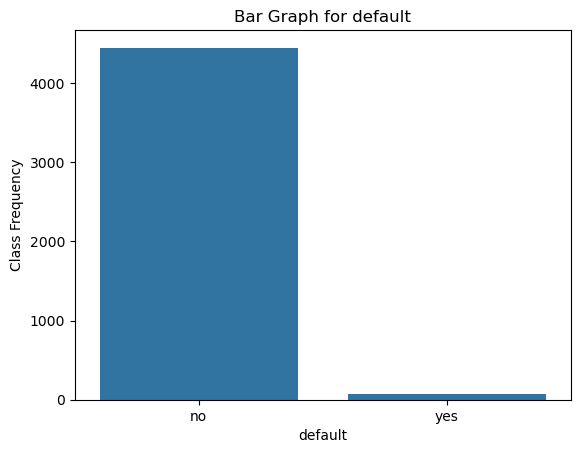

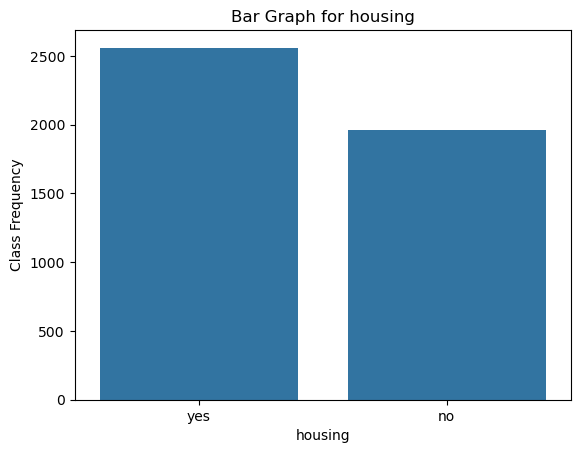

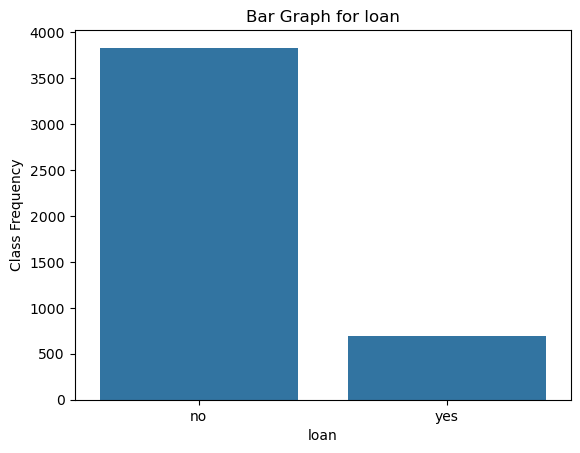

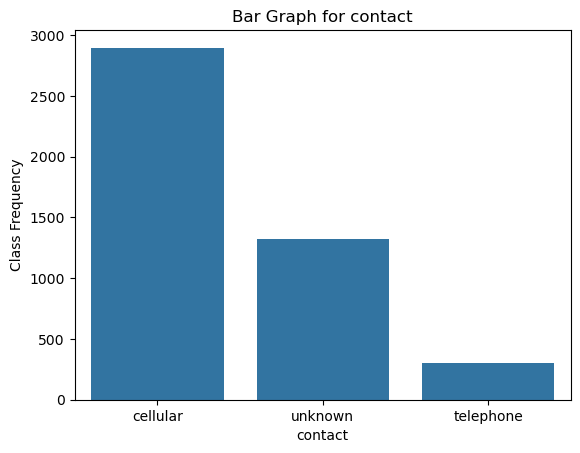

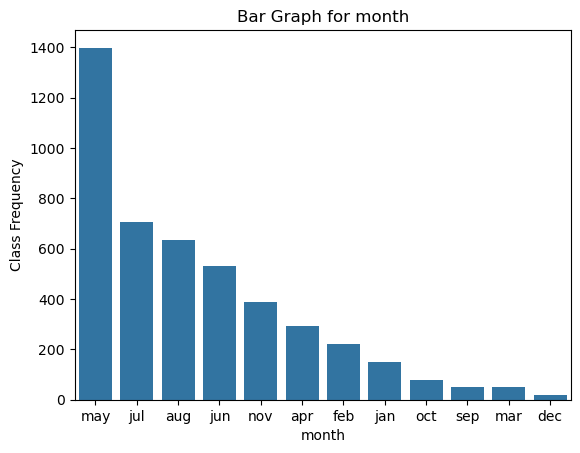

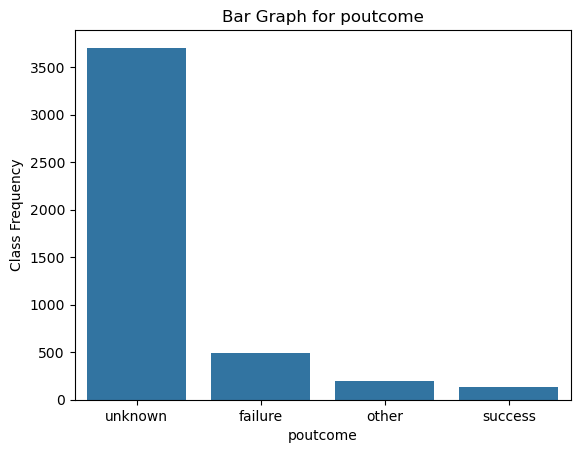

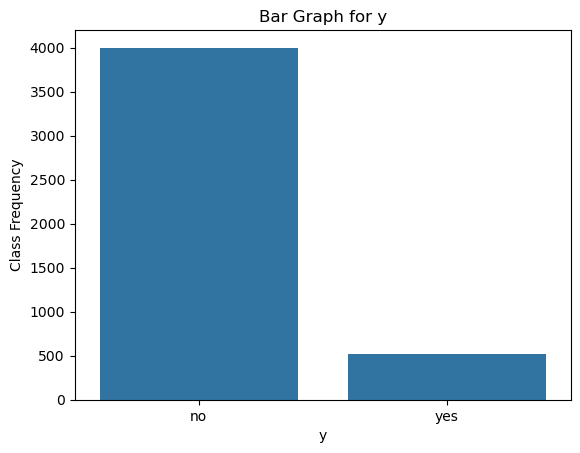

In [197]:
#all colunms ploting through loop and seborn package
orders = {}

for i in cat_col:             #loop and add columns names and keys as dict items 
    cnf = bank_df[i].value_counts()
    orders[i] = cnf.keys()


for j in cat_col:              # iiterate again categorical columns order==dict value
    sns.countplot(data=bank_df,
                 x=j,
                 order=orders[j])
    plt.title(f"Bar Graph for {j}")
    plt.xlabel(f"{j}")
    plt.ylabel("Class Frequency")
    plt.savefig(f"{new_dir}\\{i}.jpg")
    plt.show()

In [199]:
new_dir1=os.listdir(new_dir)
new_dir1

['contact.csv',
 'contact.jpg',
 'default.csv',
 'default.jpg',
 'education.csv',
 'education.jpg',
 'housing.csv',
 'housing.jpg',
 'job.csv',
 'job.jpg',
 'loan.csv',
 'loan.jpg',
 'marital.csv',
 'marital.jpg',
 'month.csv',
 'month.jpg',
 'poutcome.csv',
 'poutcome.jpg',
 'y.csv',
 'y.jpg']

In [201]:
root_d=os.getcwd()
n_dir="new_folder"
new_d=os.path.join(root_d,n_dir)
os.makedirs(new_d)

In [203]:
#save the dataframe in directory folder

for i in cat_col:
    dnf=bank_df[i].value_counts()   #using value_count() method
    keys=dnf.keys()
    values=dnf.values
    col=[i,"count"]
    df=pd.DataFrame(zip(keys,values),columns=col)
    df.to_csv(f"{new_d}\\{i}.csv",index=False)    #use dataframe name>.<to_csv("name.csv")>
    

In [205]:
dfms=os.listdir(new_d)   #check directory list
dfms 

['contact.csv',
 'default.csv',
 'education.csv',
 'housing.csv',
 'job.csv',
 'loan.csv',
 'marital.csv',
 'month.csv',
 'poutcome.csv',
 'y.csv']

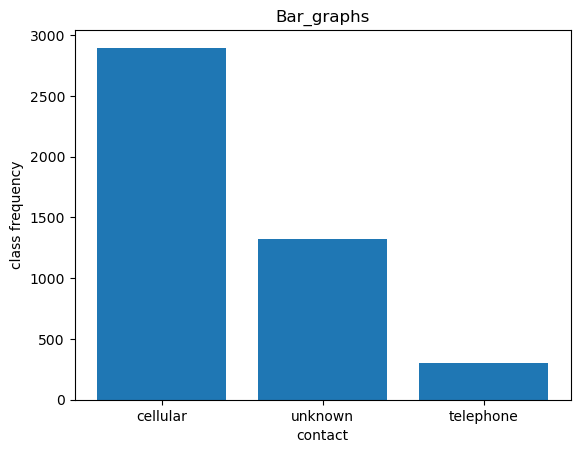

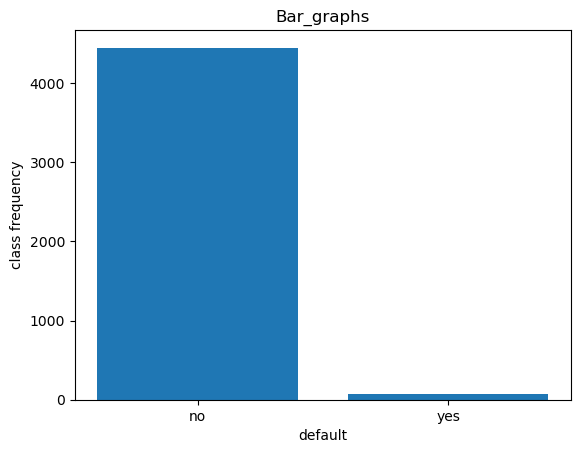

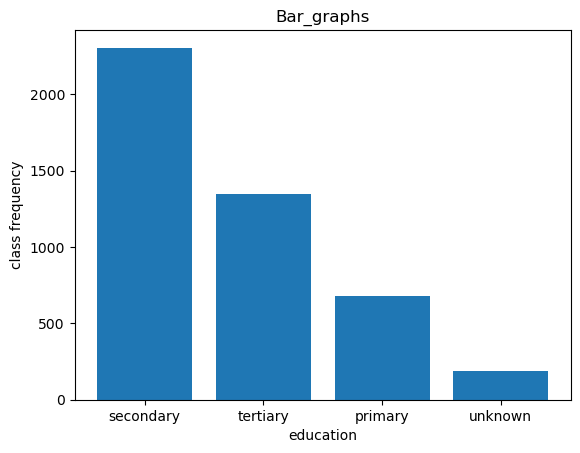

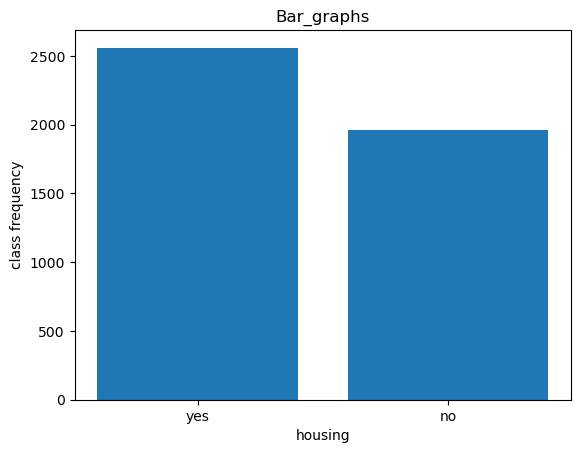

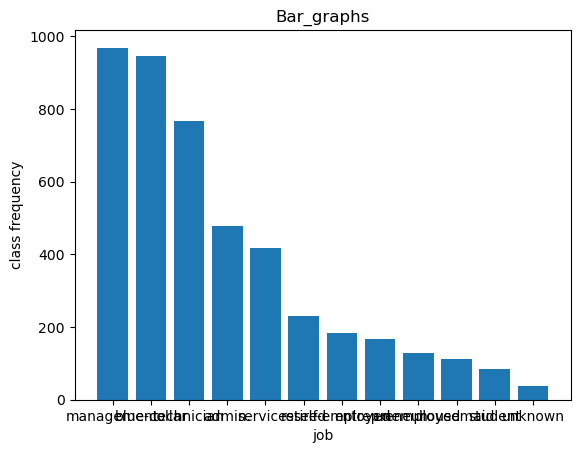

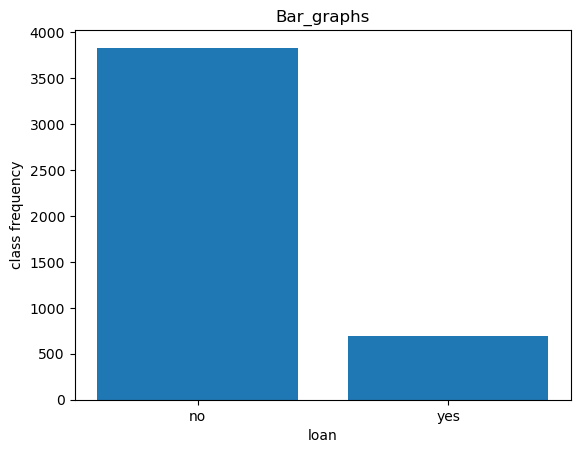

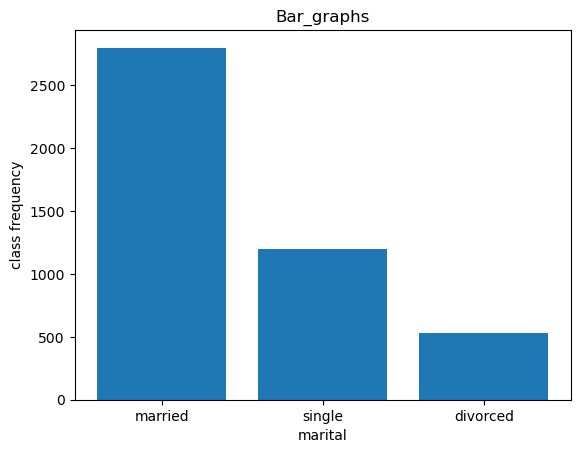

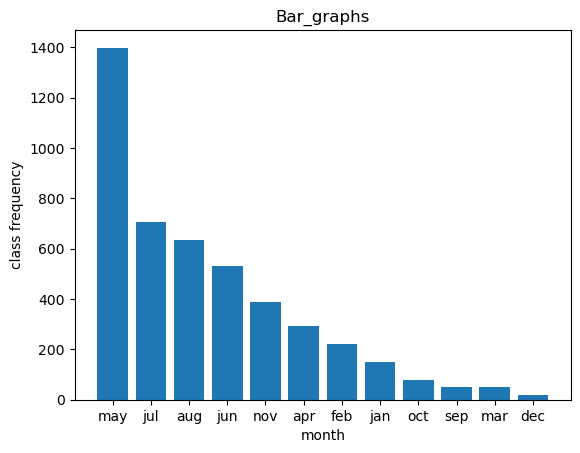

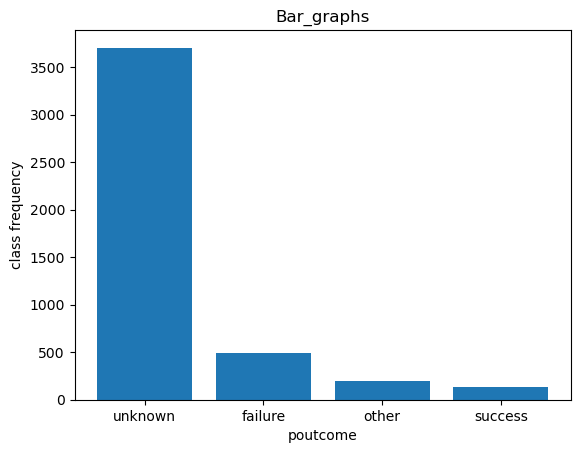

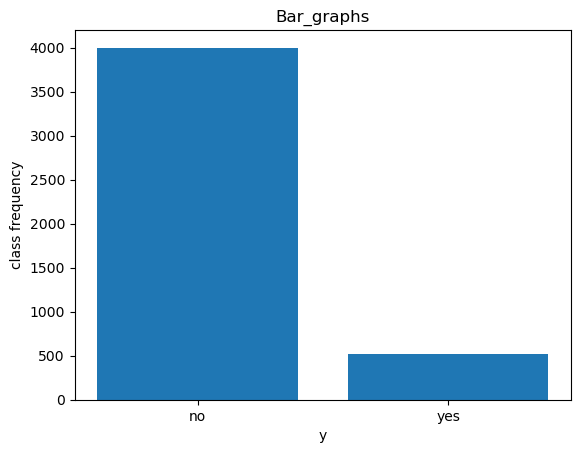

In [207]:
#read directory dataframe and plot 
for i in dfms:
    df3=pd.read_csv(f"{new_d}\\{i}")
    plt.bar(i[:-4],"count",data=df3)
    plt.xlabel(f"{i[:-4]}")
    plt.ylabel("class frequency")
    plt.title("Bar_graphs")
    plt.show()

In [ ]:
#subplot
